# 1. Importando a base de dados

In [132]:
#importando as bibliotecas que usaremos
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [133]:
#carregando a nossa base de dados limpa
database = pd.read_csv('https://raw.githubusercontent.com/marcusferreira16/ChallengeAlura/main/Semana%201%20-%20Tratamento%20de%20dados/database-churn-clean.csv', sep = ',')

In [134]:
#aumentando o limite de colunas para visualização
pd.set_option("display.max_columns", 100)

In [135]:
#visualizando nossa base de dados
database.head(5)

,ID,Churn,genero,maior_igual65,parceiro,dependentes,meses_contrato,servico_celular,multiplas_linhas,assinatura_internet,adicional_seguranca_online,adicional_backup,adicional_protecao,adicional_suporte,TVacabo,Streaming,tipo_contrato,fatura_online,tipo_pagamento,gasto_mes,total_gasto,gasto_dia
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


# 2. Análise da variável Churn

In [136]:
database.head()

,ID,Churn,genero,maior_igual65,parceiro,dependentes,meses_contrato,servico_celular,multiplas_linhas,assinatura_internet,adicional_seguranca_online,adicional_backup,adicional_protecao,adicional_suporte,TVacabo,Streaming,tipo_contrato,fatura_online,tipo_pagamento,gasto_mes,total_gasto,gasto_dia
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [137]:
#vamos visualizar como está a distribuição da nossa variável target: Churn
#primeiro, vamos fazer um gráfico categórico, para entender o volume.
#vamos ver quais são as respostas para essa variável
database['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [138]:
database[database['Churn']=='No'].count()[['Churn']]

Churn    5163
dtype: int64

In [139]:
database[database['Churn']=='Yes'].count()[['Churn']]

Churn    1869
dtype: int64

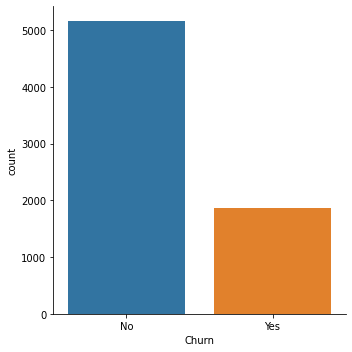

In [140]:
sns.catplot(x='Churn',data=database, kind='count')

Podemos notar que um pouco mais de 1/4 da nossa base teve churn, ou seja, deixou a empresa.

In [141]:
#vamos entender também quais são as estatísticas descritivas entre a
#variável Churn e a variável total_gasto
#primeiro quem já deixou a empresa
database[database['Churn'] == 'Yes'].describe().round(2)

,meses_contrato,gasto_mes,total_gasto,gasto_dia
count,1869.00,1869.00,1869.00,1869.00
mean,17.98,74.44,1531.80,2.48
std,19.53,24.67,1890.82,0.82
min,1.00,18.85,18.85,0.63
25%,2.00,56.15,134.50,1.87
50%,10.00,79.65,703.55,2.66
75%,29.00,94.20,2331.30,3.14
max,72.00,118.35,8684.80,3.94


In [142]:
#vamos entender também quais são as estatísticas descritivas entre a
#variável Churn e a variável total_gasto
#quem não deixou a empresa
database[database['Churn'] == 'No'].describe().round(2)

,meses_contrato,gasto_mes,total_gasto,gasto_dia
count,5163.00,5163.00,5163.00,5163.00
mean,37.65,61.31,2555.34,2.04
std,24.08,31.09,2329.46,1.04
min,1.00,18.25,18.80,0.61
25%,15.00,25.10,577.83,0.84
50%,38.00,64.45,1683.60,2.15
75%,61.00,88.48,4264.12,2.95
max,72.00,118.75,8672.45,3.96


Com as análises acima, podemos notar algumas coisas legais: 
- O número de pessoas que deixaram a empresa representa pouco mais de 26% da base total;
- Quem não deixou a empresa tem uma média de meses de contrato mais que 2x maior do que quem deixou;
- O total gasto para o quantil 75% é maior em quem já deixou a empresa, do que quem não deixou. Um fato interessante.

# 3. Variável Churn em relação com outras variáveis

## 3.1 Churn X Gasto X Idade

In [143]:
#vamos visualizar nossa base de dados novamente
database.head(5)

,ID,Churn,genero,maior_igual65,parceiro,dependentes,meses_contrato,servico_celular,multiplas_linhas,assinatura_internet,adicional_seguranca_online,adicional_backup,adicional_protecao,adicional_suporte,TVacabo,Streaming,tipo_contrato,fatura_online,tipo_pagamento,gasto_mes,total_gasto,gasto_dia
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


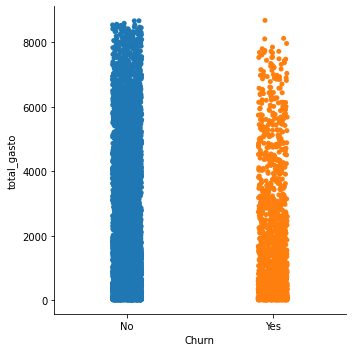

In [144]:
#Vamos fazer um gráfico categórico para entender o volume de clientes unicos em relação ao total gasto
sns.catplot(x='Churn', y='total_gasto', data=database)

Podemos notar pelo gráfico acima que os clientes que tem Churn = Yes tem um valor total gasto menor de quem não tem Churn. Sendo mais volumoso em todos os valores que tangem a variável total_gasto

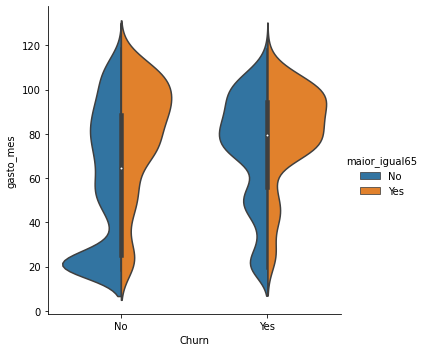

In [145]:
#Vamos entender qual a distribuição entre gasto mensal e cancelou o plano, caso seja maior que 65 anos ou não
sns.catplot(x='Churn', y='gasto_mes', hue='maior_igual65', kind='violin', split=True, data=database)

In [146]:
churn_yes = database[database['Churn']=='Yes']
idosos_churn = churn_yes[churn_yes['maior_igual65']=='Yes'].count()['maior_igual65']
print('O número de idosos (maior que 65 anos) que cancelaram o contrato é de {} representando {} porcento da base total de churn'.format(idosos_churn, ((idosos_churn/len(churn_yes))*100).round(2)))

O número de idosos (maior que 65 anos) que cancelaram o contrato é de 476 representando 25.47 porcento da base total de churn


Podemos tirar algumas conclusões do gráfico acima:
- Clientes idosos (maior que 65 anos) gastam mais do que os que não são, com gastos os maiores alocados entre a faixa de 70 até 110.
- Clientes que deram churn e são idosos gastaram mais mensalmente do que os que não são, um dos motivos pode ser por falta de conhecimento dos planos, o que pode ter resultado no cancelamento do plano visto o uso versus valor pago.
- Os idosos representam pouco mais de 1/4 da base de churn.

## 3.2 Churn X meses_contrato = Fidelidade

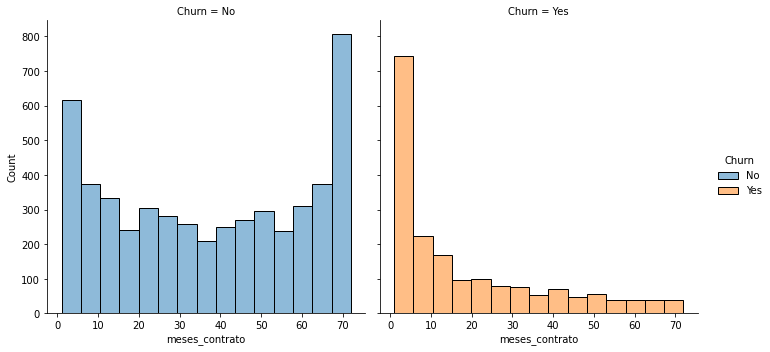

In [147]:
#Vamos entender qual a relação do churn com o total gasto e os meses de contrato
sns.displot(x='meses_contrato', hue='Churn', col='Churn', data=database)

Podemos ver que os clientes que cancelam o contrato tem uma distribuição exponencial, sendo que os 10 primeiros meses são cruciais, pois é quando a maior parte deles dá Churn.

Um plano de ação seria contatar esse cliente para entender o que ele acha do plano e o que poderia melhorar, para evitar esse Churn nos primeiros meses de contrato

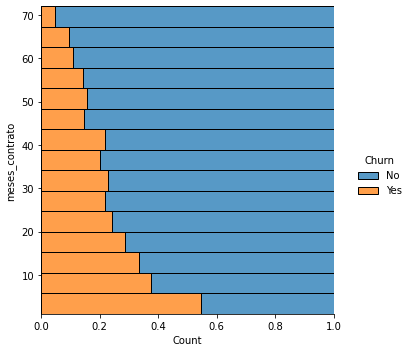

In [148]:
#Vamos entender qual a porcentagem nesses primeiros meses
sns.displot(y='meses_contrato', hue='Churn', multiple='fill', data=database)

Podemos notar que mais de 50% do clientes que deram churn não tinham nem 5 meses de contrato, é mais um indicativo que deveriamos tratar esses clientes de uma forma diferenciada nos primeiros meses de contrato.

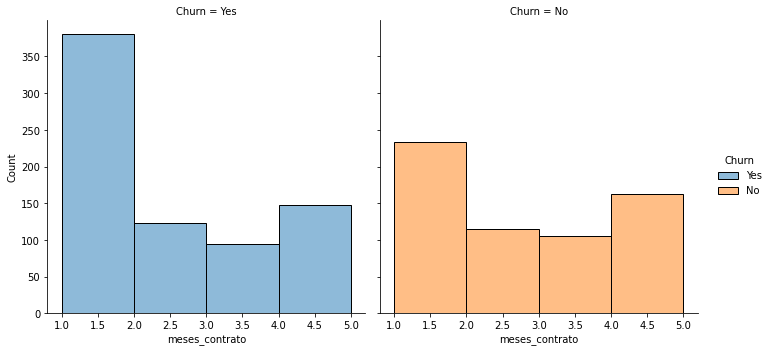

In [149]:
#dado que os clientes cancelaram nos primeiros 5 meses, vamos entender a distribuição nesses primeiros 5 meses
#para entender quais foram os meses que os clientes mais deram churn
sns.displot(x='meses_contrato', hue='Churn', col='Churn', binwidth=1,data=database[database['meses_contrato']<=5])

Podemos ver que no gráfico acima que a maioria dos cliente que dão churn são no primeiro mês de contrato.
Uma alternativa para evitar esse tipo de evasão no primeiro mês seria ter um período de "free trial", para testagem do cliente e caso faça sentido, ele comece um contrato.

## 3.3 Churn X gênero

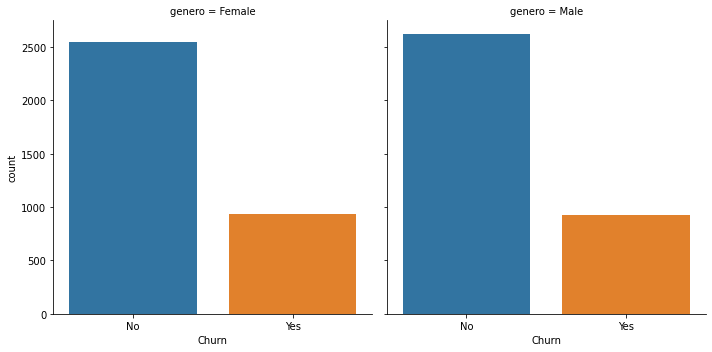

In [150]:
#vamos entender a distribuição entre gênero para entender quais derão mais churn
sns.catplot(x='Churn', col='genero', kind='count', data=database)

Podemos ver no gráfico acima que a distribuição de Churn entre homem e mulher é bem semelhante

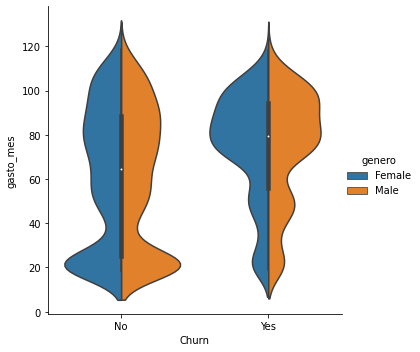

In [151]:
#vamos entender a distribuição de gastos entre os generos e o churn
sns.catplot(x='Churn', y='gasto_mes', hue='genero', kind='violin', split=True, data=database)

Podemos ver que não há comportamento de gastos diferentes entre homens e mulheres, no entanto, podemos notar que quem cancelou o contrato gastou muito mais nas faixas entre 70 e 110, bem semelhante ao que notamos no gráfico de pessoas idosas. 

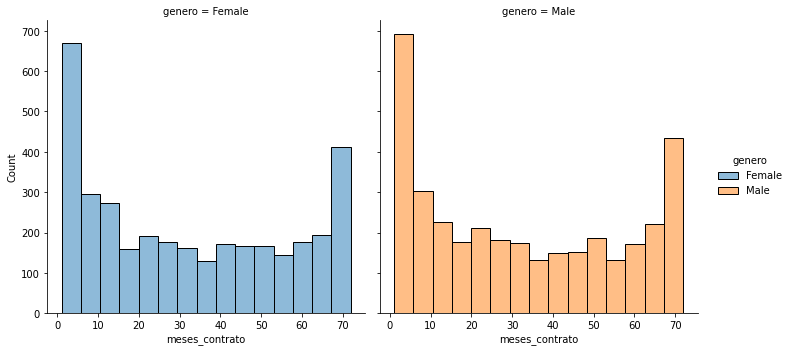

In [152]:
#por fim, vamos entender se há diferença de meses de contrato entre os generos
sns.displot(x='meses_contrato', hue='genero', col='genero', data=database)

Com pequenas diferenças, não temos evidências para discordar que os generos seguem uma distribuição diferente

### Teste de hipótese:

#### Vamos confirmar se as distribuições entre o gênero masculino e feminino são iguais.

##### H0: A distribuição dos meses de contrato dos gêneros é igual
##### H1: A distribuição dos meses de contrato dos gêneros não é igual

In [153]:
#vamos pegar a distribuição dos meses de contrato para o sexo feminino
contrato_feminino = database.query('genero == "Female"').meses_contrato

In [154]:
#vamos pegar a distribuição dos meses de contrato para o sexo masculino
contrato_masculino = database.query('genero == "Male"').meses_contrato

In [155]:
#importando uma biblioteca estatística para fazer o teste de hipótese
from scipy.stats import ranksums

In [156]:
#fazendo o teste de hipótese
hip = ranksums(contrato_feminino, contrato_masculino)

In [157]:
#valor do p-valor
print('O valor do p-value é {}'.format((hip.pvalue).round(3)))

O valor do p-value é 0.755


**Temos um p-valor de 0.755, com um nível de significância de 5%, não temos evidências para aceitar a hipótese alternativa, sendo assim, aceitamos a hipótese nula de que a distribuição dos meses de contratos dos gêneros é igual**

## **Podemos tirar como conclusão os seguintes pontos:**

- O período onde tem mais churn é nos primeiros 5 meses, sendo o primeiro mês mais ofensor na saída dos clientes. Uma alternativa para controlar a expectativa de um novo cliente é ter um período de teste, conhecido como "free trial";
- Clientes que dão churn gastam mais por mês do que os não cancelaram o contrato o que pode ser um motivo de cancelarem, ou seja, um plano divergente do que o cliente precisa evidentemente;
- O gênero não muda a distribuição de cancelamento de contratos;
- Os idosos (mais de 65 anos) representam pouco mais de 1/4 da base de clientes que cancelaram o contrato.

# 4. Análise de correlação entre as variáveis

## Referências:
### Encoding de variáveis categóricas:

https://pbpython.com/categorical-encoding.html

https://www.askpython.com/python/examples/label-encoding

### Correlação e heatmap:

https://medium.com/omixdata/estatística-análise-de-correlação-usando-python-e-r-d68611511b5a

https://cursos.alura.com.br/course/estatistica-correlacao-regressao/task/57519


## 4.1 Transformando nossas colunas

#### Para fazer a correlação das variáveis, precisamos primeiro transformá-las em númericas/decimais

In [162]:
#verificando nossa base de dados
database.head(1)

,ID,Churn,genero,maior_igual65,parceiro,dependentes,meses_contrato,servico_celular,multiplas_linhas,assinatura_internet,adicional_seguranca_online,adicional_backup,adicional_protecao,adicional_suporte,TVacabo,Streaming,tipo_contrato,fatura_online,tipo_pagamento,gasto_mes,total_gasto,gasto_dia
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.19


In [165]:
#criando um database copia, para alterarmos os tipos das colunas sem mudar o 
#dataframe principal
database_copy = database.copy()

In [180]:
#pegando nossas colunas, pois iremos alterar o tipo dela para fazer a correlação
database.columns

Index(['ID', 'Churn', 'genero', 'maior_igual65', 'parceiro', 'dependentes',
       'meses_contrato', 'servico_celular', 'multiplas_linhas',
       'assinatura_internet', 'adicional_seguranca_online', 'adicional_backup',
       'adicional_protecao', 'adicional_suporte', 'TVacabo', 'Streaming',
       'tipo_contrato', 'fatura_online', 'tipo_pagamento', 'gasto_mes',
       'total_gasto', 'gasto_dia'],
      dtype='object')

In [181]:
# função que transforma os valores categóricos de uma coluna em valores numéricos
def label_encoding(categorical_col):
  # altera o tipo de "object" para o tipo "category"
  encode = categorical_col.astype('category')
  # atribui a cada categoria um valor numérico diferente
  return encode.cat.codes

In [182]:
# vamos alterar os tipos da nossa coluna através de um for
cat_columns = ['Churn', 'genero', 'maior_igual65', 'parceiro', 'dependentes',
       'meses_contrato', 'servico_celular', 'multiplas_linhas',
       'assinatura_internet', 'adicional_seguranca_online', 'adicional_backup',
       'adicional_protecao', 'adicional_suporte', 'TVacabo', 'Streaming',
       'tipo_contrato', 'fatura_online', 'tipo_pagamento', 'gasto_mes',
       'total_gasto', 'gasto_dia']

for col in cat_columns:
  database_copy[col] = label_encoding(database_copy[col])

In [183]:
#Validando se alteramos corretamente
database_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          7032 non-null   object
 1   Churn                       7032 non-null   int8  
 2   genero                      7032 non-null   int8  
 3   maior_igual65               7032 non-null   int8  
 4   parceiro                    7032 non-null   int8  
 5   dependentes                 7032 non-null   int8  
 6   meses_contrato              7032 non-null   int8  
 7   servico_celular             7032 non-null   int8  
 8   multiplas_linhas            7032 non-null   int8  
 9   assinatura_internet         7032 non-null   int8  
 10  adicional_seguranca_online  7032 non-null   int8  
 11  adicional_backup            7032 non-null   int8  
 12  adicional_protecao          7032 non-null   int8  
 13  adicional_suporte           7032 non-null   int8

In [184]:
#calculando a correlação
correlacao = database_copy.corr()

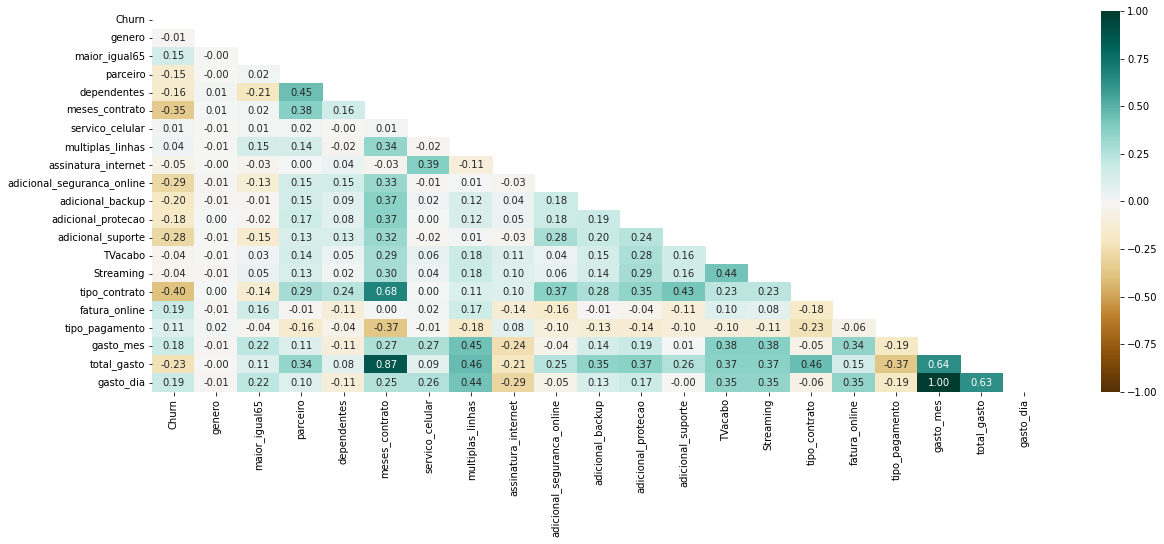

In [191]:
# aumentando o tamanho da figura para facilitar a visualização
fig_dim = (20, 7)
fig, ax = plt.subplots(figsize=fig_dim)

#annot = correlacao na celula; fmt = formato; vmin e vmax=gradiente de corres;
mask = np.triu(np.ones_like(correlacao, dtype = bool)) #retirando a parte de cima da diagonal
sns.heatmap(correlacao, annot=True, fmt='.2f', ax=ax, vmin=-1, vmax=1, cmap = 'BrBG', mask = mask)

Podemos perceber uma correlação em dois extremos (azul e marrom).

Podemos ver uma alta correlação entre as variáveis:
- Gasto mensal e Diario;
- Gasto total e Meses de contrato;
- Tipo de contrato e Meses de contrato.

Outras correlações podemos ler de acordo com as cores de suas respectivas células.